# Alcoholism data set (source = Wooldridge, Introductory Econometrics)

In [35]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# import mglearn
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Load data set
alcohol = pd.read_csv("alcohol.txt")
# Remove squaredal terms - these terms i
alcohol.drop(['agesq','beertaxsq','cigtaxsq','ethanolsq','educsq'],axis=1,inplace=True)
alcohol.head()

,id,abuse,status,unemrate,age,educ,married,famsize,white,exhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
0,1,1,1,4.0,50,4,1,1,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,0,0
1,2,0,3,4.0,37,12,1,5,1,0,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
2,3,0,3,4.0,53,9,1,3,1,1,...,0,0,0.334,38.0,2.03946,0,0,0,1,1
3,4,0,3,3.3,59,11,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,0,0,1,1
4,5,0,3,3.3,43,10,1,1,1,1,...,0,0,0.240,26.0,2.44998,0,1,1,1,1


(array([8848.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

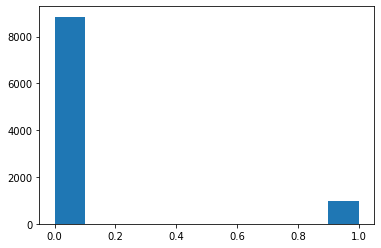

In [5]:
# this plot shows how unbalanced the data set is
plt.hist(alcohol.abuse)

# Some simple rebalancing

In [6]:
# generate special classes for types
count0, count1 = alcohol.abuse.value_counts()
aclass0 = alcohol[alcohol.abuse==0]
aclass1 = alcohol[alcohol.abuse==1]
print(count0)
print(count1)

8848
974


# Over sample class 1

8848


(array([8848.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        8848.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

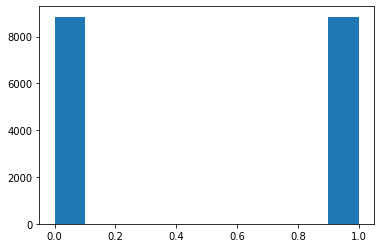

In [7]:
# over sampling for class 1
# Generate a new sample of count0 items of count1
over1 = aclass1.sample(count0,replace=True)
alcoholos = pd.concat([aclass0,over1],axis=0)
print(len(over1))
plt.hist(alcoholos.abuse)

# Undersample Class 0

In [8]:
# under sampling
# Generate sample of class 0 types matching number of class 1 types
under0 = aclass0.sample(count1)
alcoholus = pd.concat([under0,aclass1],axis=0)

(array([974.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 974.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

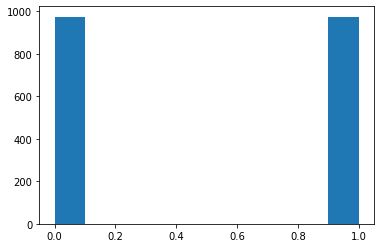

In [10]:
plt.hist(alcoholus.abuse)

In [9]:
# set up data, and check if balanced
y = alcoholus.abuse
X = alcoholus.iloc[:,2:33]
print(np.mean(y))
X.head()

0.5


,status,unemrate,age,educ,married,famsize,white,exhealth,vghealth,goodhealth,...,qrt2,qrt3,beertax,cigtax,ethanol,mothalc,fathalc,livealc,inwf,employ
5504,3,3.3,29,17,0,1,0,0,1,0,...,0,1,0.240,26.0,2.44998,0,0,0,1,1
367,3,6.4,33,12,0,1,1,0,0,1,...,0,0,0.180,20.0,2.18556,0,1,1,1,1
1374,3,6.0,37,4,1,4,1,1,0,0,...,0,0,0.360,14.0,1.73238,0,0,0,1,1
8656,3,5.3,57,12,1,2,1,0,0,0,...,0,0,0.259,10.5,1.69371,0,0,0,1,1
4389,3,3.2,36,12,1,2,1,0,1,0,...,1,0,0.145,14.0,2.48013,0,0,0,1,1


### Example of three simple classifiers

### Logistic Regression

In [30]:
# Now set up a grid search over parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
score_used = 'accuracy' 
# set up dictionary for grid search
param_grid={'C':[1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08, 1.e+09],'max_iter':[2000]}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.25, train_size=0.75, n_splits=100)
# set up search
grid_search=GridSearchCV(LogisticRegression(),param_grid,cv=shuffle_split,scoring=score_used, 
                              return_train_score=True)
scaler = StandardScaler().fit(X)
X_scale = scaler.transform(X)
# implement search
grid_search.fit(X_scale,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_C']])

    rank_test_score  mean_test_score param_C
0                15         0.489179   1e-05
1                14         0.517721  0.0001
2                13         0.550719   0.001
3                 1         0.553018    0.01
4                12         0.552074     0.1
5                11         0.552444       1
6                 2         0.552485      10
7                 3         0.552464     100
8                 3         0.552464    1000
9                 3         0.552464   10000
10                3         0.552464  100000
11                3         0.552464   1e+06
12                3         0.552464   1e+07
13                3         0.552464   1e+08
14                3         0.552464   1e+09


Text(0, 0.5, 'Mean Test Score')

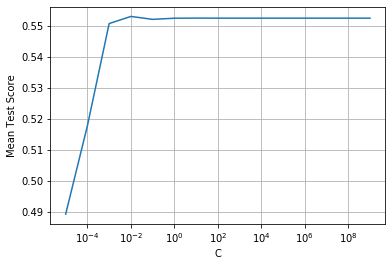

In [31]:
plt.semilogx(results.param_C,results.mean_test_score)
plt.grid()
plt.xlabel('C')
plt.ylabel('Mean Test Score')

### K Nearest Neighbors Classification

In [32]:
score_used = 'accuracy' 
# set up dictionary for grid search
param_grid={'n_neighbors':[10, 50, 100, 200, 300, 400, 500]}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.25, train_size=0.75, n_splits=100)
# set up search
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,cv=shuffle_split,scoring=score_used, 
                              return_train_score=True)
# implement search
grid_search.fit(X_scale,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_n_neighbors']])

   rank_test_score  mean_test_score param_n_neighbors
0                7         0.516057                10
1                3         0.537967                50
2                2         0.538747               100
3                4         0.537803               200
4                1         0.538994               300
5                5         0.533409               400
6                6         0.530554               500


Text(0, 0.5, 'Mean Test Score')

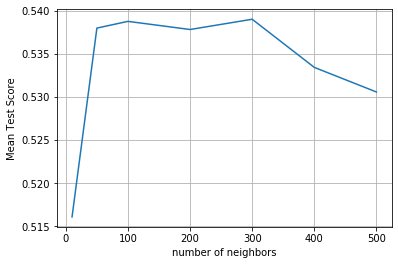

In [34]:
plt.plot(results.param_n_neighbors,results.mean_test_score)
plt.grid()
plt.xlabel('number of neighbors')
plt.ylabel('Mean Test Score')

### Random Forest Classifier

In [42]:
score_used = 'accuracy' 
# set up dictionary for grid search
maxf=np.arange(start=1,stop=11,step=1,dtype=int)
maxd=np.arange(start=2,stop=11,step=2,dtype=int)
param_grid={'n_estimators':[100],'max_features':maxf,'max_depth':maxd}
# set up cross-validation shuffles
shuffle_split = ShuffleSplit(test_size=0.25, train_size=0.75, n_splits=100)
# set up search
grid_search=GridSearchCV(RandomForestClassifier(),param_grid,cv=shuffle_split,scoring=score_used, 
                              return_train_score=True)
# implement search
# Scaling is done to Normalize data so that priority is not given to a particular feature. 
# Role of Scaling is mostly important in algorithms that are distance based and require Euclidean Distance.
# Random Forest is a tree-based model and hence does not require feature scaling.
# This algorithm requires partitioning, even if you apply Normalization then also> the result would be the same.
grid_search.fit(X,y)
# move results into DataFrame
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_max_features','param_max_depth']])

    rank_test_score  mean_test_score param_max_features param_max_depth
0                50         0.533347                  1               2
1                31         0.537823                  2               2
2                15         0.542752                  3               2
3                 7         0.546140                  4               2
4                 5         0.546242                  5               2
5                 4         0.546550                  6               2
6                 1         0.547967                  7               2
7                 2         0.547823                  8               2
8                 3         0.547331                  9               2
9                 6         0.546160                 10               2
10               33         0.537495                  1               4
11               14         0.542772                  2               4
12               10         0.544538                  3         